# Data Pre-processing

Struct your own dataset as used here.

## Prepare Data

I structured some data in my own server. Here the data is downloaded and extracted from the compressed file.

In [ ]:
!wget "http://pub.farzaneh21.ir:8000/transcripts.zip"
!unzip transcripts.zip

--2024-11-24 09:23:00--  http://pub.farzaneh21.ir:8000/transcripts.zip
Resolving pub.farzaneh21.ir (pub.farzaneh21.ir)... 65.109.200.43
Connecting to pub.farzaneh21.ir (pub.farzaneh21.ir)|65.109.200.43|:8000... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32006921 (31M) [application/zip]
Saving to: ‘transcripts.zip’

transcripts.zip     100%[===================>]  30.52M  9.77MB/s    in 3.6s    

2024-11-24 09:23:04 (8.53 MB/s) - ‘transcripts.zip’ saved [32006921/32006921]

Archive:  transcripts.zip
   creating: transcripts/
   creating: transcripts/bee_hive_data/
  inflating: transcripts/bee_hive_data/flow_2017.csv  
  inflating: transcripts/bee_hive_data/flow_wurzburg.csv  
  inflating: transcripts/bee_hive_data/humidity_schwartau.csv  
  inflating: transcripts/bee_hive_data/weight_schwartau.csv  
  inflating: transcripts/bee_hive_data/weight_wurzburg.csv  
  inflating: transcripts/bee_hive_data/weight_2017.csv  
  inflating: transcripts/bee_hive_data/humidity_20

| Variable | Definition | Key |
|---|---|---|
| timestamp | Date of the Measurment | Year-Month-Day Hour:Minute:Second|
|temperature| Temperature in the Beehive| in °C|
|humidity| Humidity in the Beehive| in %|
|weight| Weight of the Beehive| in g|
|flow| Number of bees that leave(negativ) or enter(positiv) the Hive| Positiv or Negativ Number|

## Introduction

The **optimal humidity** is between the **50% and 60%** and the **optimal temperature** is between the **30-35 °C**.

In [ ]:
import pandas as pd
from io import StringIO
import matplotlib as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from datetime import datetime
import plotly.express as px
from IPython.display import HTML, display
import missingno as msno
import plotly.graph_objects as go
from IPython.display import Image
import plotly.io as pio

In [ ]:
temp_sch = "transcripts/bee_hive_data/temperature_schwartau.csv"
flow_sch = "transcripts/bee_hive_data/flow_schwartau.csv"
weight_sch = "transcripts/bee_hive_data/weight_schwartau.csv"
humidity_sch = "transcripts/bee_hive_data/humidity_schwartau.csv"

In [ ]:
temp_sch = pd.read_csv(temp_sch)
flow_sch = pd.read_csv(flow_sch)
weight_sch = pd.read_csv(weight_sch)
humidity_sch = pd.read_csv(humidity_sch)

In [ ]:
def to_datetime(dataframe):
    dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])
    return dataframe
def fill_missings(dataframe):
    dataframe.fillna(method='ffill', inplace=True)
    return dataframe
def groupby_day(dataframe):
    dataframe.sort_values(by="timestamp")
    dataframe.set_index('timestamp', inplace=True)
    dataframe = dataframe.groupby(pd.Grouper(freq='D')).mean()
    return dataframe

## Temperature
Looking at the Temperature of the Beehive.

In [ ]:
temp_sch.head()

,timestamp,temperature
0,2017-01-01 14:10:00,NaN
1,2017-01-01 14:15:00,12.340
2,2017-01-01 14:20:00,12.270
3,2017-01-01 14:25:00,12.276
4,2017-01-01 14:30:00,12.356


Handling the Missings in the Data.

In [ ]:
missing_values_temp = pd.DataFrame(temp_sch.isnull().sum(), columns=['ID'])
missing_values_temp

,ID
timestamp,0
temperature,2032


In [ ]:
temp_sch = fill_missings(temp_sch)

<ipython-input-9-77551eb7c785>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe.fillna(method='ffill', inplace=True)


In [ ]:
temp_sch.dropna(axis=0, inplace=True)

In [ ]:
temp_sch = to_datetime(temp_sch)

temp_sch = groupby_day(temp_sch)

temp_sch.head()

,temperature
timestamp,
2017-01-01,15.477829
2017-01-02,13.376389
2017-01-03,16.181965
2017-01-04,14.724111
2017-01-05,9.058442


## Flow
Looking at the Flow of the Beehive.

In [ ]:
flow_sch.head()

,timestamp,flow
0,2017-01-01 14:15:00,0
1,2017-01-01 14:16:00,0
2,2017-01-01 14:17:00,0
3,2017-01-01 14:18:00,0
4,2017-01-01 14:19:00,0


Handling the Missings in the Data.

In [ ]:
missing_values_flow = pd.DataFrame(flow_sch.isnull().sum(), columns=['ID'])
missing_values_flow

,ID
timestamp,0
flow,0


In [ ]:
flow_sch = to_datetime(flow_sch)
flow_sch = groupby_day(flow_sch)
flow_sch.head()

,flow
timestamp,
2017-01-01,-0.004274
2017-01-02,-0.007639
2017-01-03,-0.010417
2017-01-04,-0.009722
2017-01-05,-0.003819


## Weight
Looking at the Weight of the Beehive.

In [ ]:
weight_sch.head()

,timestamp,weight
0,2017-01-01 13:00:00,50736.790078
1,2017-01-02 01:00:00,50700.685000
2,2017-01-02 13:00:00,50614.907500
3,2017-01-03 01:00:00,50739.824167
4,2017-01-03 13:00:00,50799.746944


Handling the Missings in the Data.

In [ ]:
missing_values_weight = pd.DataFrame(weight_sch.isnull().sum(), columns=['ID'])
missing_values_weight

,ID
timestamp,0
weight,12


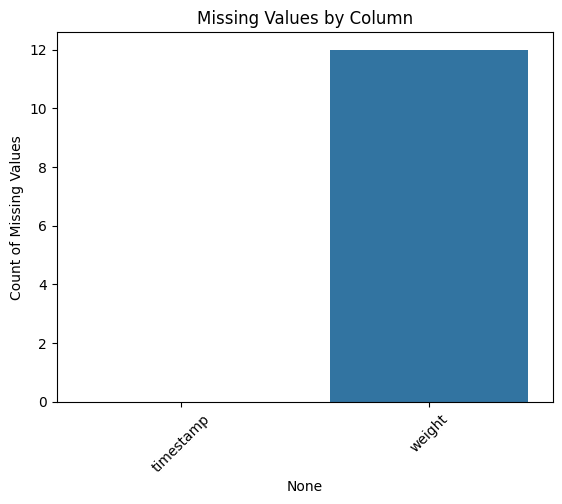

In [ ]:
missing_data = weight_sch.isnull().sum()
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.title("Missing Values by Column")
plt.ylabel("Count of Missing Values")
plt.xticks(rotation=45)
plt.show()

In [ ]:
weight_sch = fill_missings(weight_sch)

<ipython-input-9-77551eb7c785>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe.fillna(method='ffill', inplace=True)


In [ ]:
weight_sch = to_datetime(weight_sch)

weight_sch = groupby_day(weight_sch)

weight_sch.head()

,weight
timestamp,
2017-01-01,50736.790078
2017-01-02,50657.796250
2017-01-03,50769.785556
2017-01-04,50532.602778
2017-01-05,50109.808194


## Humidity
Looking at the Humidity of the Beehive.

In [ ]:
humidity_sch.head()

,timestamp,humidity
0,2017-01-01 13:00:00,98.040310
1,2017-01-02 01:00:00,98.610556
2,2017-01-02 13:00:00,99.002083
3,2017-01-03 01:00:00,98.486806
4,2017-01-03 13:00:00,98.320139


Handling the Missings in the Data.

In [ ]:
missing_values_humidity = pd.DataFrame(humidity_sch.isnull().sum(), columns=['ID'])
missing_values_humidity

,ID
timestamp,0
humidity,12


In [ ]:
humidity_sch.describe()

,humidity
count,1749.000000
mean,83.987777
std,26.501904
min,-100.000000
25%,79.326167
50%,91.066806
75%,96.611806
max,100.000000


In [ ]:
humidity_sch.drop(humidity_sch[humidity_sch['humidity'] < 0].index, inplace=True)

In [ ]:
humidity_sch = fill_missings(humidity_sch)

<ipython-input-9-77551eb7c785>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataframe.fillna(method='ffill', inplace=True)


In [ ]:
humidity_sch = to_datetime(humidity_sch)

humidity_sch = groupby_day(humidity_sch)

humidity_sch.head()

,humidity
timestamp,
2017-01-01,98.040310
2017-01-02,98.806319
2017-01-03,98.403472
2017-01-04,97.292292
2017-01-05,96.583889


## Joining all the data into one dataframe.

In [ ]:
bee_hive_sch = temp_sch.join([flow_sch, humidity_sch, weight_sch])

In [ ]:
bee_hive_sch.reset_index(level=0, inplace=True)
bee_hive_sch.head()

,timestamp,temperature,flow,humidity,weight
0,2017-01-01,15.477829,-0.004274,98.040310,50736.790078
1,2017-01-02,13.376389,-0.007639,98.806319,50657.796250
2,2017-01-03,16.181965,-0.010417,98.403472,50769.785556
3,2017-01-04,14.724111,-0.009722,97.292292,50532.602778
4,2017-01-05,9.058442,-0.003819,96.583889,50109.808194


In [ ]:
bee_hive_sch.tail()

,timestamp,temperature,flow,humidity,weight
876,2019-05-27,34.675375,-0.864236,91.927014,75616.592500
877,2019-05-28,34.636979,-0.626042,92.573125,75220.172986
878,2019-05-29,34.355271,-0.602778,93.529514,74863.086111
879,2019-05-30,34.290264,-1.022569,94.833958,74926.407014
880,2019-05-31,34.258849,-2.407710,94.315139,74875.142431


In [ ]:
bee_hive_sch

,timestamp,temperature,flow,humidity,weight
0,2017-01-01,15.477829,-0.004274,98.040310,50736.790078
1,2017-01-02,13.376389,-0.007639,98.806319,50657.796250
2,2017-01-03,16.181965,-0.010417,98.403472,50769.785556
3,2017-01-04,14.724111,-0.009722,97.292292,50532.602778
4,2017-01-05,9.058442,-0.003819,96.583889,50109.808194
...,...,...,...,...,...
876,2019-05-27,34.675375,-0.864236,91.927014,75616.592500
877,2019-05-28,34.636979,-0.626042,92.573125,75220.172986
878,2019-05-29,34.355271,-0.602778,93.529514,74863.086111
879,2019-05-30,34.290264,-1.022569,94.833958,74926.407014


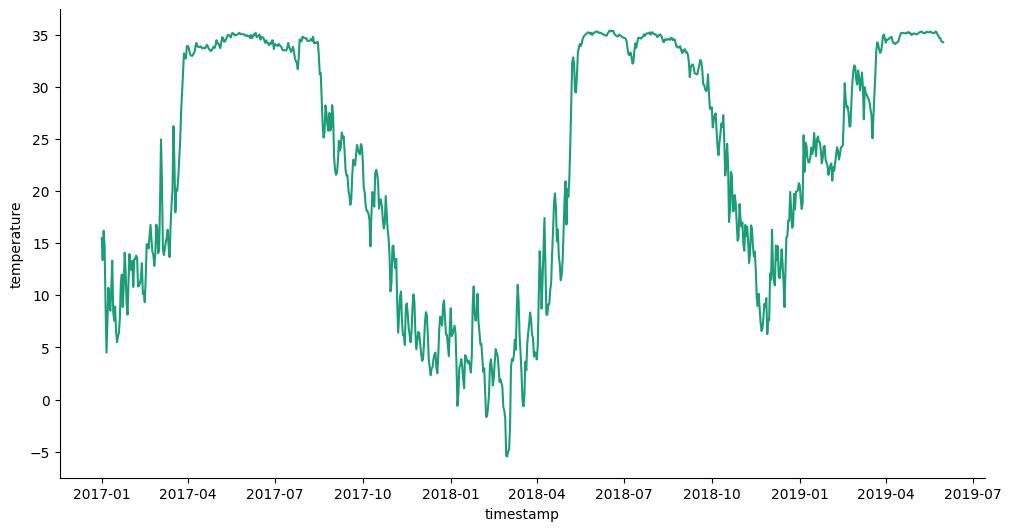

In [ ]:
# @title timestamp vs temperature

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['temperature']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = bee_hive_sch.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('temperature')

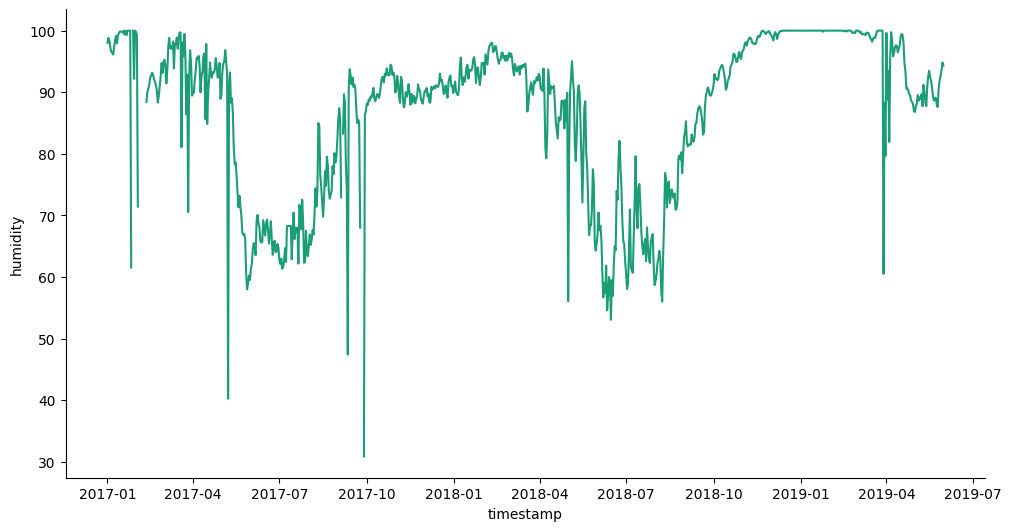

In [ ]:
# @title timestamp vs humidity

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['humidity']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = bee_hive_sch.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('humidity')

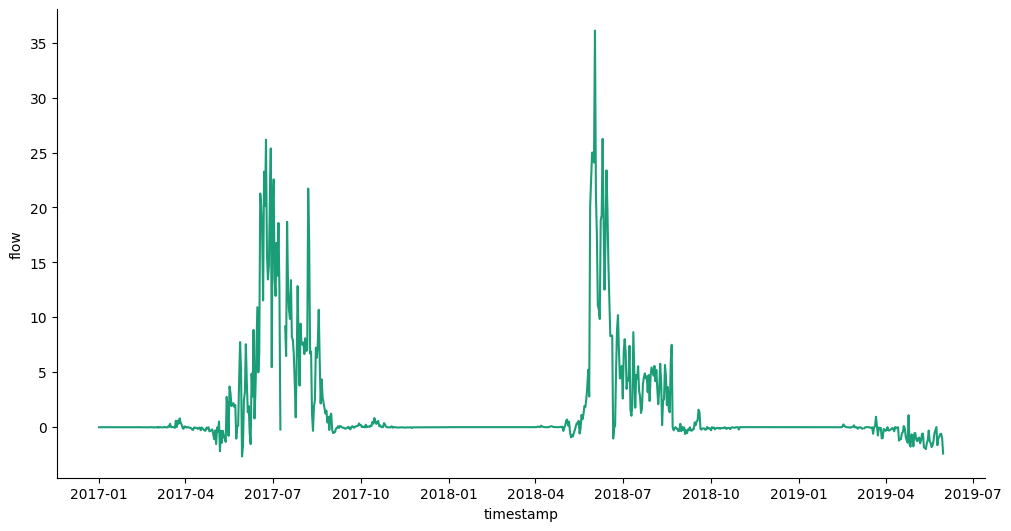

In [ ]:
# @title timestamp vs flow

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['timestamp']
  ys = series['flow']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = bee_hive_sch.sort_values('timestamp', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('timestamp')
_ = plt.ylabel('flow')

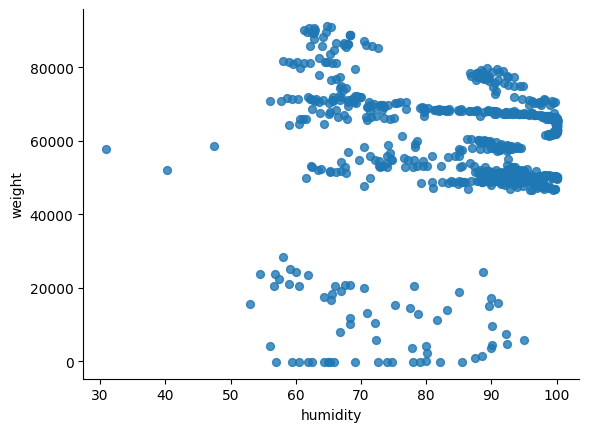

In [ ]:
# @title humidity vs weight

from matplotlib import pyplot as plt
bee_hive_sch.plot(kind='scatter', x='humidity', y='weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

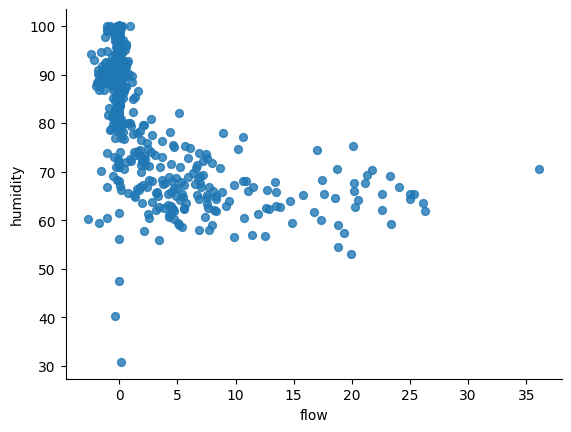

In [ ]:
# @title flow vs humidity

from matplotlib import pyplot as plt
bee_hive_sch.plot(kind='scatter', x='flow', y='humidity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

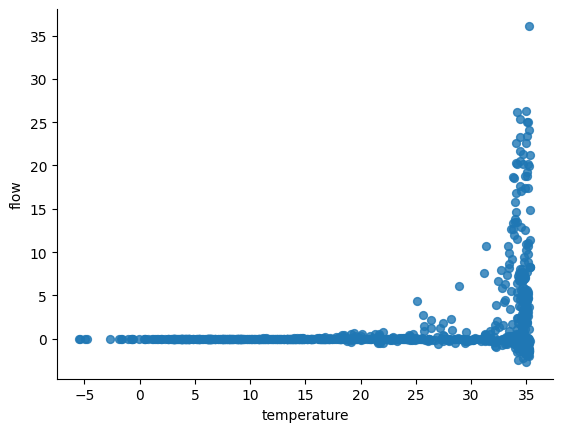

In [ ]:
# @title temperature vs flow

from matplotlib import pyplot as plt
bee_hive_sch.plot(kind='scatter', x='temperature', y='flow', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

## Compare the effect of tempreture and humidity on Flow

<ipython-input-54-0e23930ee54d>:30: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


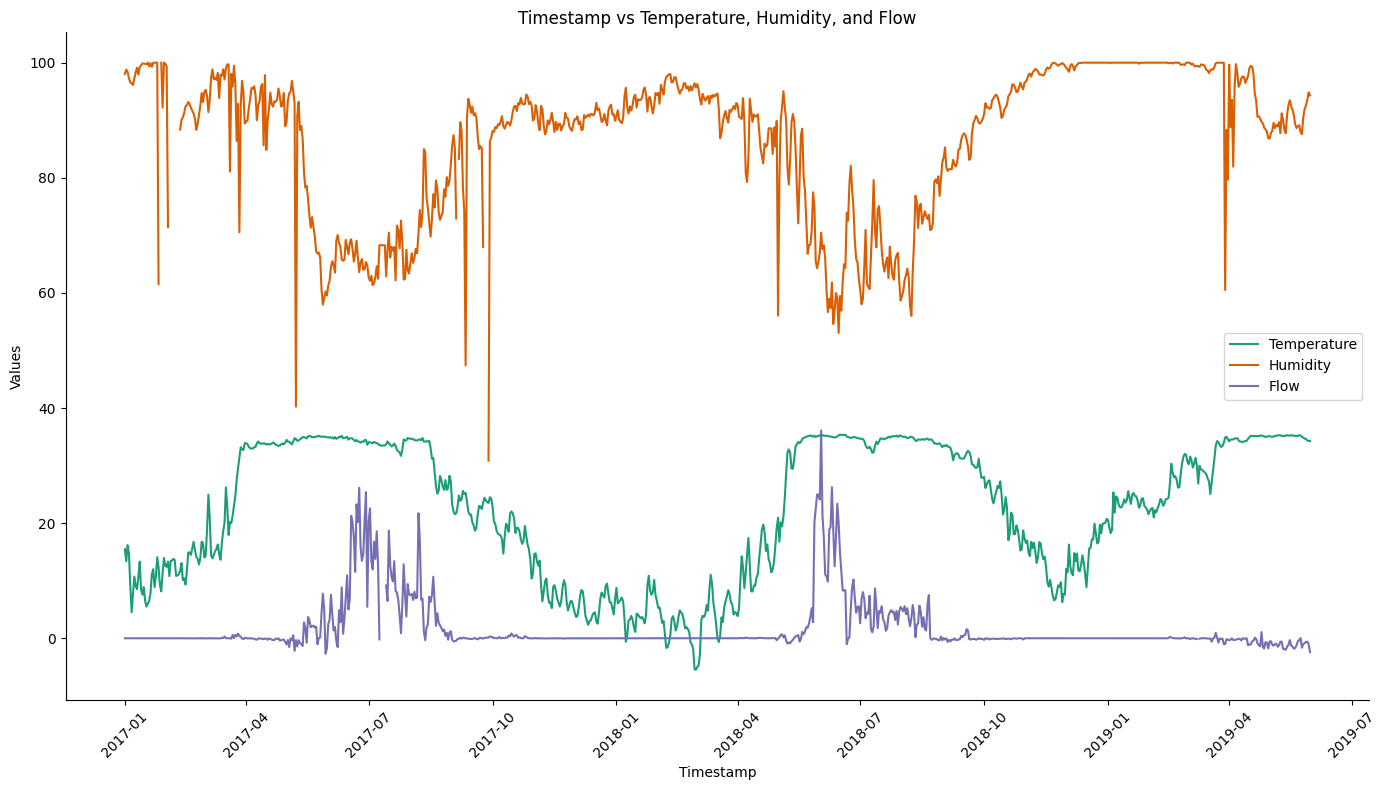

In [ ]:
# Function to plot each series
def _plot_series(series, column_name, series_index, label):
    palette = list(sns.palettes.mpl_palette('Dark2'))
    xs = series['timestamp']
    ys = series[column_name]
    plt.plot(xs, ys, label=label, color=palette[series_index % len(palette)])

# Sorting the data by timestamp
df_sorted = bee_hive_sch.sort_values('timestamp', ascending=True)

# Plotting all three series together
fig, ax = plt.subplots(figsize=(14, 8), layout='constrained')

# Plot temperature
_plot_series(df_sorted, 'temperature', series_index=0, label='Temperature')

# Plot humidity
_plot_series(df_sorted, 'humidity', series_index=1, label='Humidity')

# Plot flow
_plot_series(df_sorted, 'flow', series_index=2, label='Flow')

# Adding labels, title, and legend
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Timestamp vs Temperature, Humidity, and Flow')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-50-de366edf57bf>:20: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


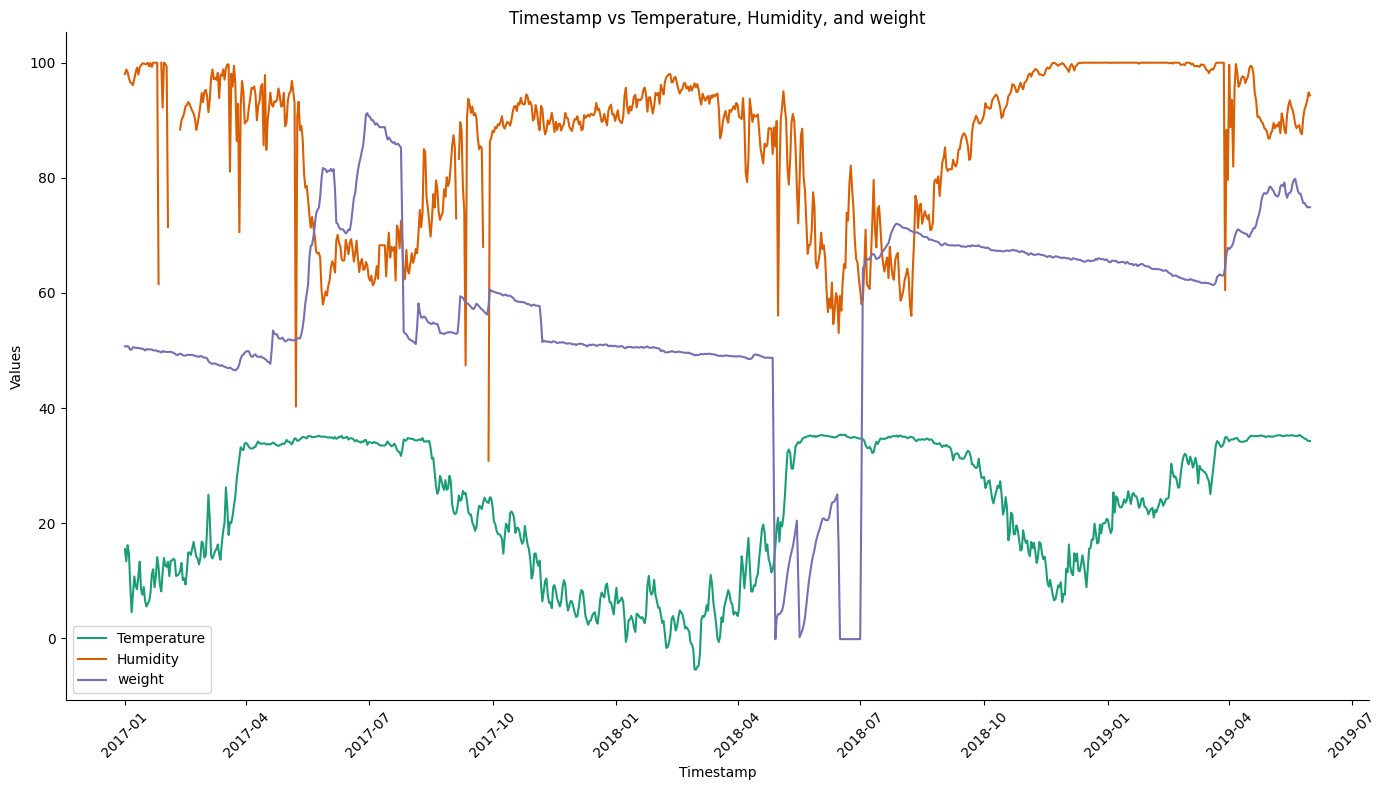

In [ ]:
# Plotting all three series together
fig, ax = plt.subplots(figsize=(14, 8), layout='constrained')

# Plot temperature
_plot_series(df_sorted, 'temperature', series_index=0, label='Temperature')

# Plot humidity
_plot_series(df_sorted, 'humidity', series_index=1, label='Humidity')

# Plot flow
_plot_series(df_sorted, 'weight_n', series_index=2, label='weight')

# Adding labels, title, and legend
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Timestamp vs Temperature, Humidity, and weight')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-55-99343d213c40>:23: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


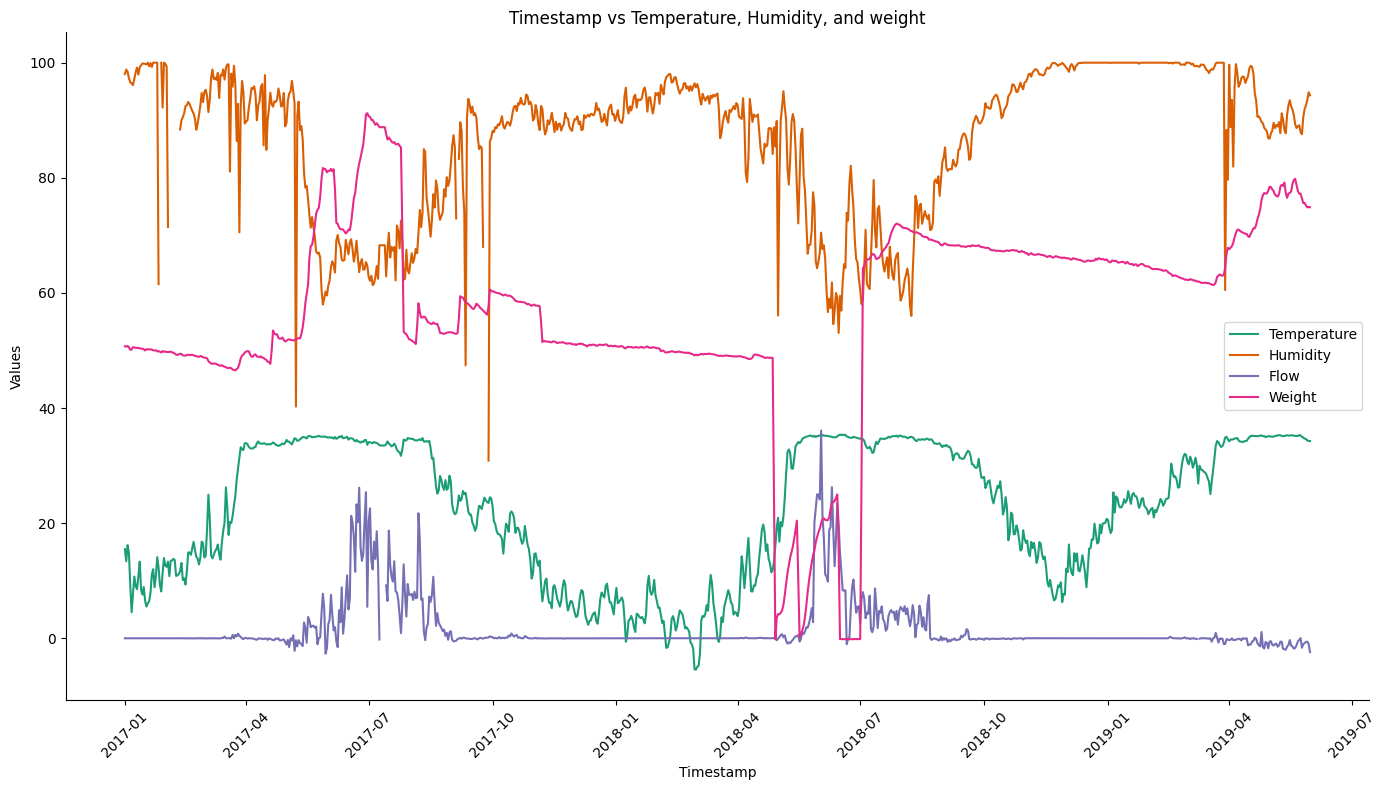

In [ ]:
# Plotting all three series together
fig, ax = plt.subplots(figsize=(14, 8), layout='constrained')

# Plot temperature
_plot_series(df_sorted, 'temperature', series_index=0, label='Temperature')

# Plot humidity
_plot_series(df_sorted, 'humidity', series_index=1, label='Humidity')

# Plot flow
_plot_series(df_sorted, 'flow', series_index=2, label='Flow')

# Weight
_plot_series(df_sorted, 'weight_n', series_index=3, label='Weight')

# Adding labels, title, and legend
sns.despine(fig=fig, ax=ax)
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.title('Timestamp vs Temperature, Humidity, and weight')
plt.legend(loc='best')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Final analysis and Future works

We compare the flow of each attribute and correlation in this section

![SeasonsSensors](.imgs/sensorparams_seasons.png)

Obviously, the climate affects all attributes. In the fall, the temperature decreases and remains at its minimum level during winter. It may also drop too low, which should trigger an alarm if it falls below approximately 6 degrees Celsius. In warmer seasons, the temperature typically does not exceed 38 degrees Celsius.

Sometimes, the relative humidity experiences sudden drops, which may be a result of climate changes (e.g., a rainy day). Therefore, a sudden change over a short duration is not a cause for concern. However, long-term humidity levels should be considered in the analysis.

The weight generally reaches its maximum during spring and the first half of summer. However, there are some non-matching values and periods that require more accurate data, reasons, and further analysis.

In general, we should use real-world data with more accurate information about why certain changes have occurred and whether they caused any problems. For all processes, the current season should be taken into account. Humidity should be analyzed over the long term, and temperature should be monitored to ensure it does not fall below or rise above the danger zone.